#**GATHERING DATA**

In [38]:
import pandas as pd   #Library for manipualtion and filtering the data.
import numpy as np  #Library for scientific computing.
import matplotlib.pyplot as plt  #Library for Data visualization.
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [39]:
#Importing Insurance Dataset using read_csv in pandas.
df = pd.read_csv("insurance_data.csv", index_col = [0])

In [40]:
#"head()" used to get first 5 rows of dataset.
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
index,,,,,,,,,,
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 115.2+ KB


In [42]:
df.isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [43]:
df.shape

(1340, 10)

In [44]:
#Extracting out the values count in columns using loop and "value_counts()".
column_value_count = ["gender", "children", "smoker", "region", "diabetic"]
for i in df[column_value_count]:
  print(df[i].value_counts())
  print("\n---------------------------------\n")

male      678
female    662
Name: gender, dtype: int64

---------------------------------

0    576
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

---------------------------------

No     1066
Yes     274
Name: smoker, dtype: int64

---------------------------------

southeast    443
northwest    349
southwest    314
northeast    231
Name: region, dtype: int64

---------------------------------

No     698
Yes    642
Name: diabetic, dtype: int64

---------------------------------



#**DATA PRE-PROCESSING**

In [46]:
#"describe()" used to give statistics for numerical parameteric column.
df.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [47]:
#"nunique()" used to distinct values in each column in dataset.
df.nunique()

PatientID        1340
age                43
gender              2
bmi               275
bloodpressure      61
diabetic            2
children            6
smoker              2
region              4
claim            1337
dtype: int64

In [64]:
df.isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
bmi_cat          0
dtype: int64

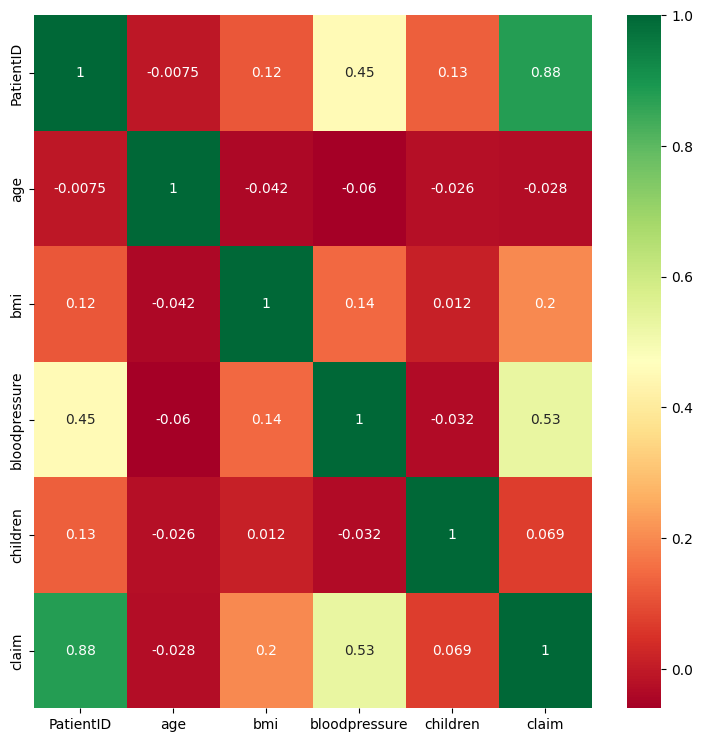

In [48]:
#Defining the correlation between the attributes.
corr_df = df.corr()
top_corr_fig = corr_df.index
plt.figure(figsize=(9,9))
sns.heatmap(df[top_corr_fig].corr(), annot=True, cmap ="RdYlGn")
plt.show()

#**FEATURE ENGINEERING**

#####Column : BMI

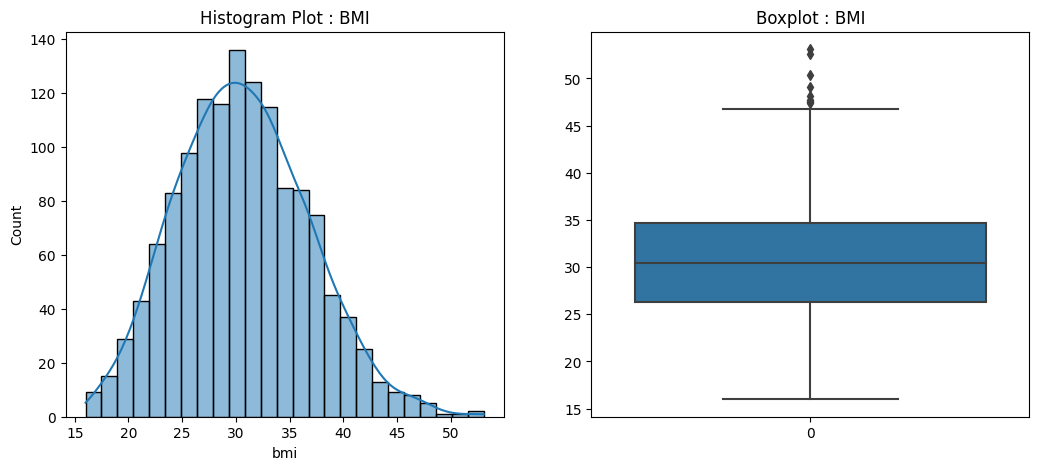


Before Removing Outliers :  0.28597245020808587 



In [49]:
plt.figure(figsize=(26,5))
plt.subplot(1,4,1)
sns.histplot((df["bmi"]), kde = True)
plt.title("Histogram Plot : BMI")

plt.subplot(1,4,2)
sns.boxplot(df["bmi"])
plt.title("Boxplot : BMI")
plt.show()

print("\nBefore Removing Outliers : ", df["bmi"].skew(),"\n")

Total rows removed : 9 

After Removing Outliers :  0.1617930296259756 



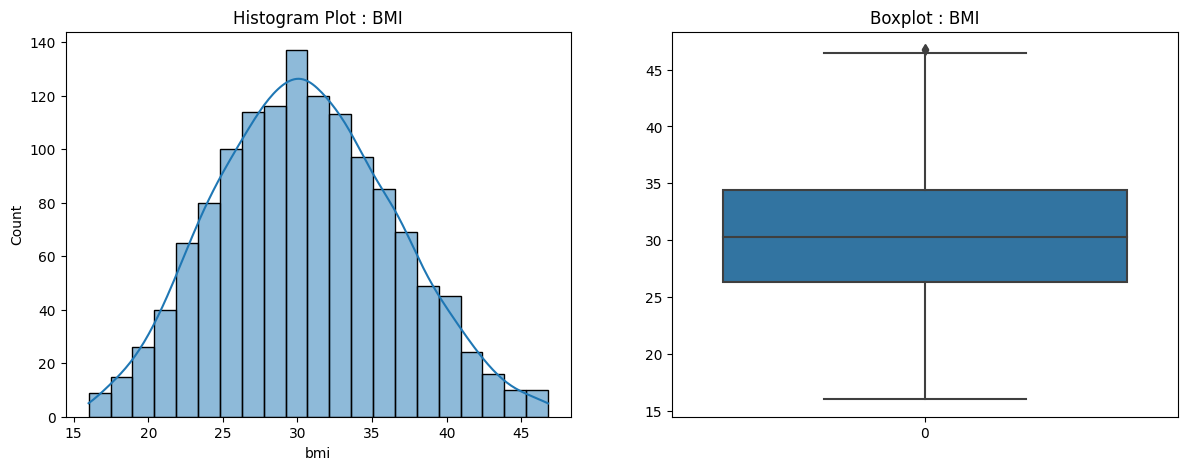

In [50]:
q3 = df["bmi"].quantile(0.75)
q1 = df["bmi"].quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

#Replacing outliers with NAN value.
outier = 0
for i in df["bmi"]:
  if i > upper:
    outier+=1
    df["bmi"].replace(i,np.nan, inplace = True)
print("Total rows removed :",outier,"\n")

#As the data is skewed, we will replace NAN value with Median value.
from sklearn.impute import SimpleImputer 
bmi = SimpleImputer(strategy='median') 
bmi_reshape = np.array(df["bmi"]).reshape(-1, 1)
df["bmi"] = bmi.fit_transform(bmi_reshape)

print("After Removing Outliers : ", df["bmi"].skew(),"\n")


plt.figure(figsize=(30,5))
plt.subplot(1,4,1)
sns.histplot((df["bmi"]), kde = True)
plt.title("Histogram Plot : BMI")

plt.subplot(1,4,2)
sns.boxplot(df["bmi"])
plt.title("Boxplot : BMI")
plt.show()

#####Column : Age

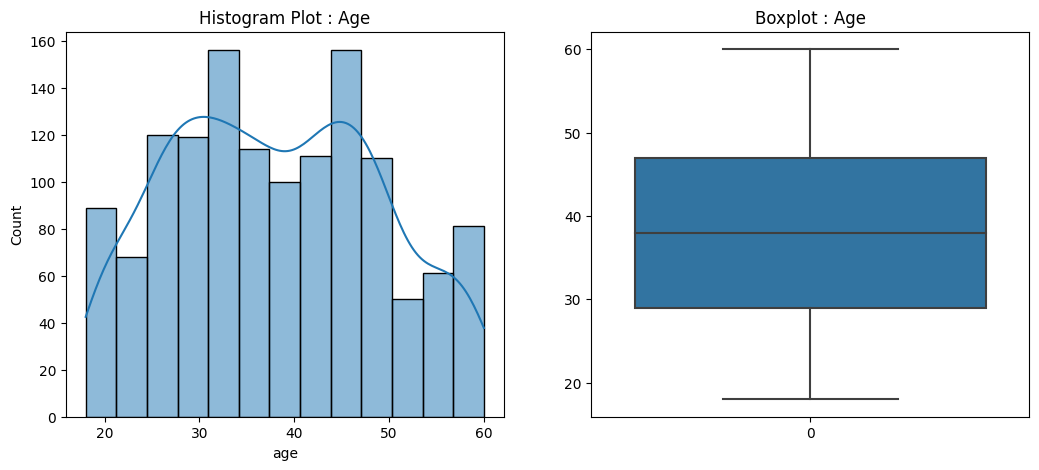


Before Removing Outliers :  0.11361133741072633 



In [51]:
plt.figure(figsize=(26,5))
plt.subplot(1,4,1)
sns.histplot((df["age"]), kde = True)
plt.title("Histogram Plot : Age")

plt.subplot(1,4,2)
sns.boxplot(df["age"])
plt.title("Boxplot : Age")
plt.show()

print("\nBefore Removing Outliers : ", df["age"].skew(),"\n")

#####Column : Blood Pressure

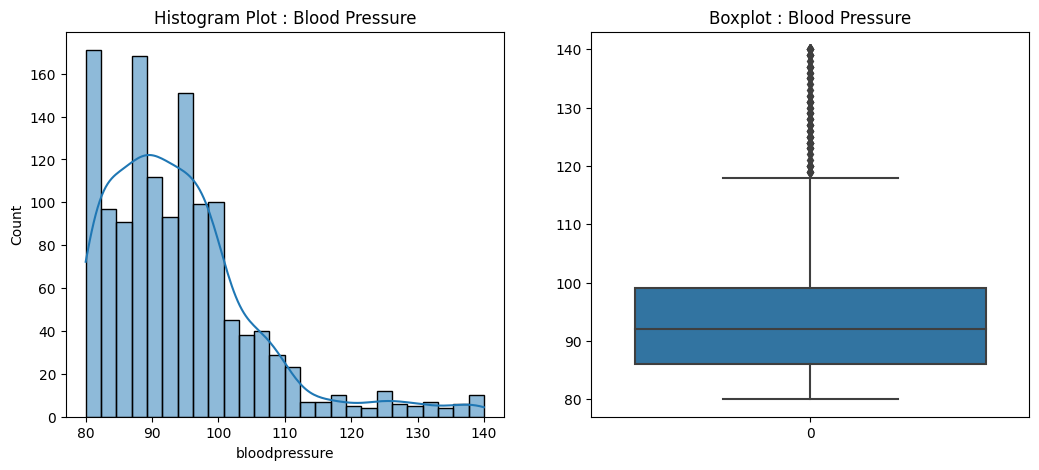


Before Removing Outliers :  1.4835342102293079 



In [52]:
plt.figure(figsize=(26,5))
plt.subplot(1,4,1)
sns.histplot((df["bloodpressure"]), kde = True)
plt.title("Histogram Plot : Blood Pressure")

plt.subplot(1,4,2)
sns.boxplot(df["bloodpressure"])
plt.title("Boxplot : Blood Pressure")
plt.show()

print("\nBefore Removing Outliers : ", df["bloodpressure"].skew(),"\n")

Total rows removed : 62 

After Removing Outliers :  0.5521760044596141 



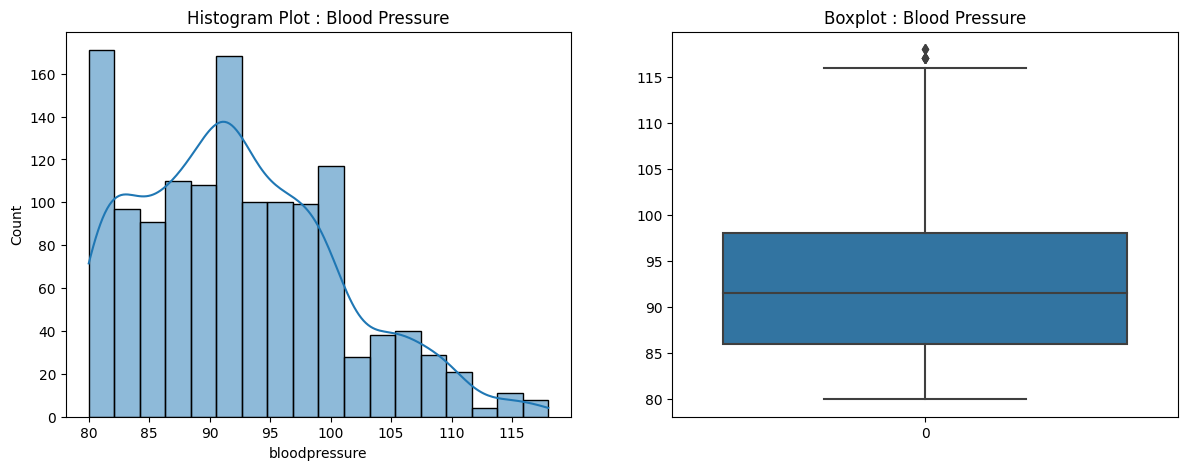

In [53]:
q3_bp = df["bloodpressure"].quantile(0.75)
q1_bp = df["bloodpressure"].quantile(0.25)
iqr_bp = q3_bp - q1_bp
upper_bp = q3_bp + (1.5*iqr_bp)
lower_bp = q1_bp - (1.5*iqr_bp)

#Replacing outliers with NAN value.
outier = 0
for i in df["bloodpressure"]:
  if i > upper_bp:
    outier+=1
    df["bloodpressure"].replace(i,np.nan, inplace = True)
print("Total rows removed :",outier,"\n")

#As the data is skewed, we will replace NAN value with Median value.
from sklearn.impute import SimpleImputer 
bp = SimpleImputer(strategy='median') 
bp_reshape = np.array(df["bloodpressure"]).reshape(-1, 1)
df["bloodpressure"] = bp.fit_transform(bp_reshape)

print("After Removing Outliers : ", df["bloodpressure"].skew(),"\n")


plt.figure(figsize=(30,5))
plt.subplot(1,4,1)
sns.histplot((df["bloodpressure"]), kde = True)
plt.title("Histogram Plot : Blood Pressure")

plt.subplot(1,4,2)
sns.boxplot(df["bloodpressure"])
plt.title("Boxplot : Blood Pressure")
plt.show()

#####Column : Claim

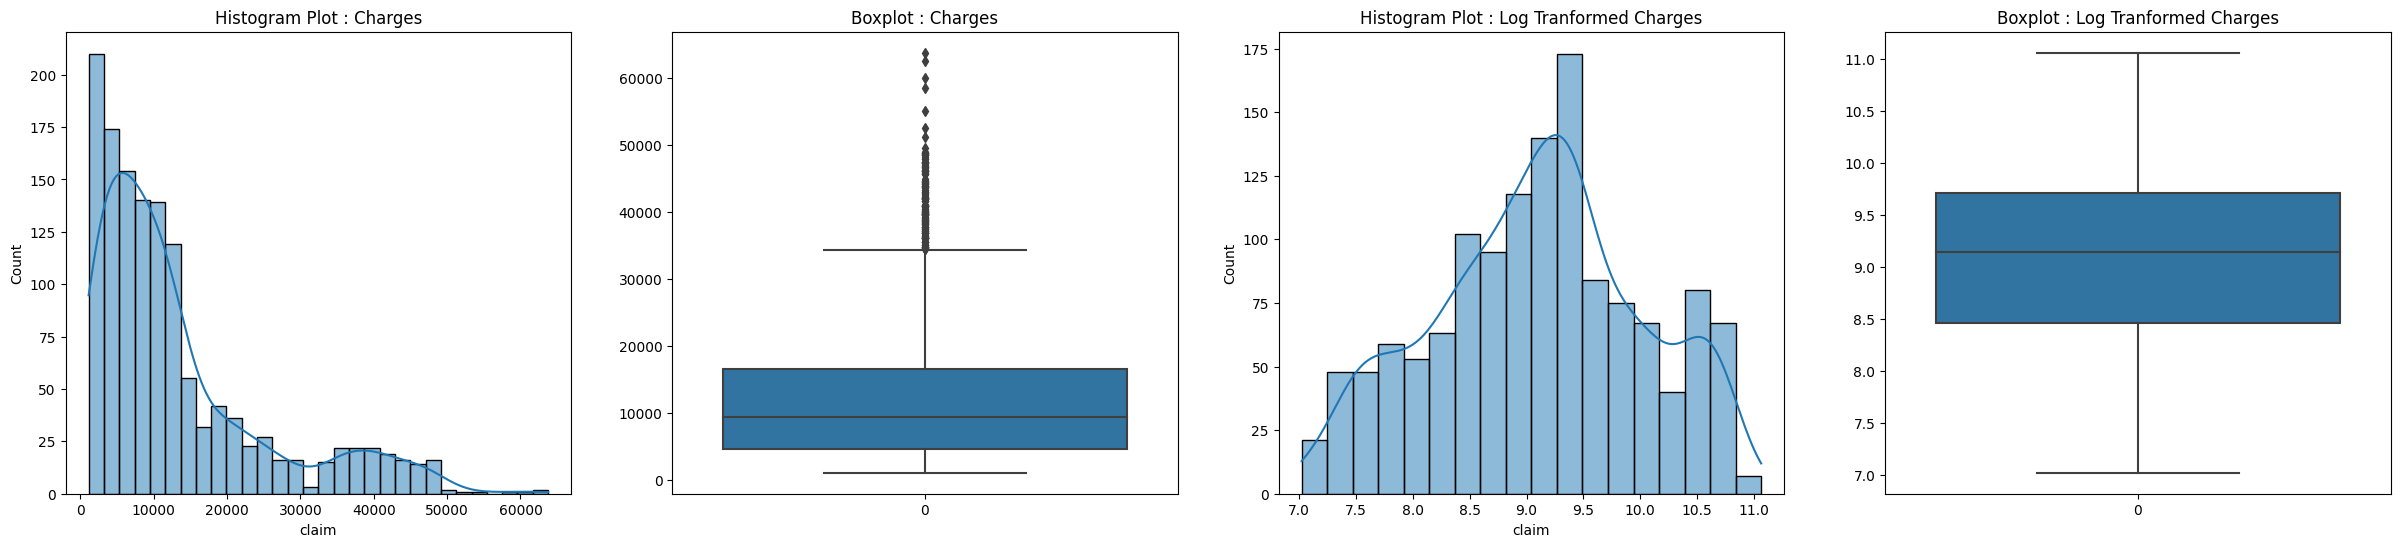


Before Transformation :  1.5167468509489237 

After Transformation :  -0.09291760558430683


In [54]:
plt.figure(figsize=(30,6))
plt.subplot(1,4,1)
sns.histplot((df["claim"]), kde = True)
plt.title("Histogram Plot : Charges")

plt.subplot(1,4,2)
sns.boxplot(df["claim"])
plt.title("Boxplot : Charges")

plt.subplot(1,4,3)
sns.histplot(np.log(df["claim"]), kde = True)
plt.title("Histogram Plot : Log Tranformed Charges")

plt.subplot(1,4,4)
sns.boxplot(np.log(df["claim"]))
plt.title("Boxplot : Log Tranformed Charges")
plt.show()

print("\nBefore Transformation : ", df["claim"].skew(),"\n")
print("After Transformation : ", np.log(df["claim"]).skew())

#####New Column : BMI Category

In [56]:
def bmi_categories(value):
    if pd.isna(value):
        return np.nan
    
    if value < 18.5:
        return "underweight"
    elif value >= 18.5 and value < 25:
        return "normal"
    elif value >= 25 and value <= 30:
        return "overweight"
    elif value >= 30:
        return "obesity"
    else:
        return value

# now create the categories according to the values
df["bmi_cat"] = df["bmi"].apply(lambda x: bmi_categories(x)).copy()

#**EDA**

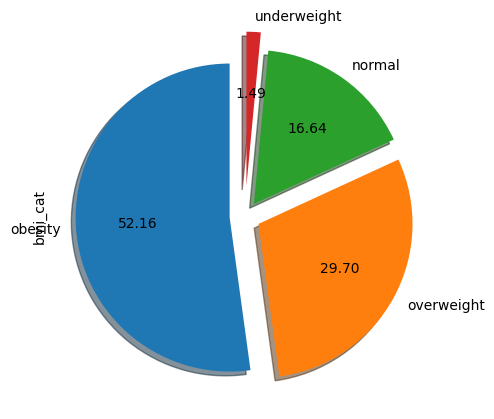

In [57]:
df["bmi_cat"].value_counts().plot.pie(startangle = 90, shadow = True, explode=(0.1, 0.1, 0.1, 0.2), figsize=(5, 5), autopct='%.2f')
plt.show()

**OBSERVATION :-**
* 52.16% people are Obese, 29.7% people are Overweight, 1.49% people are Underweight and 16.64% people are Normal.

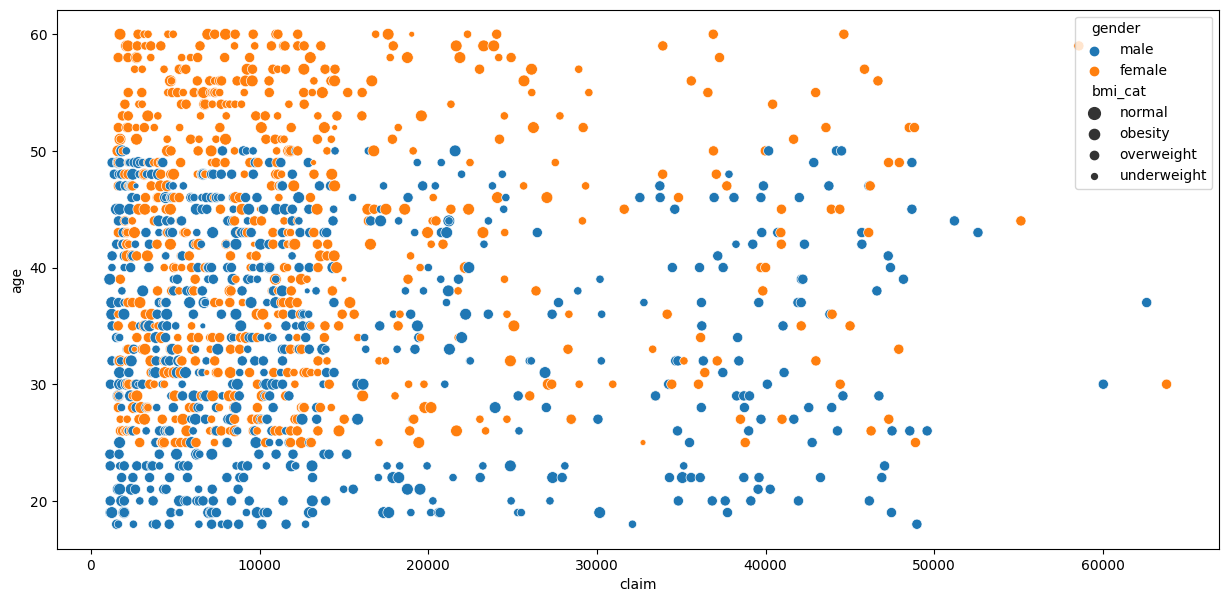

In [58]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x="claim", y="age", hue="gender", size = "bmi_cat") 
plt.show()

**OBSERVATION :-**
* Claim between 0 to 15000 is more by all the Age group.
* Male claim only age between 0 to 50 whereas Female claim between 25 to 60.
* Rare people claim 45000 and above.

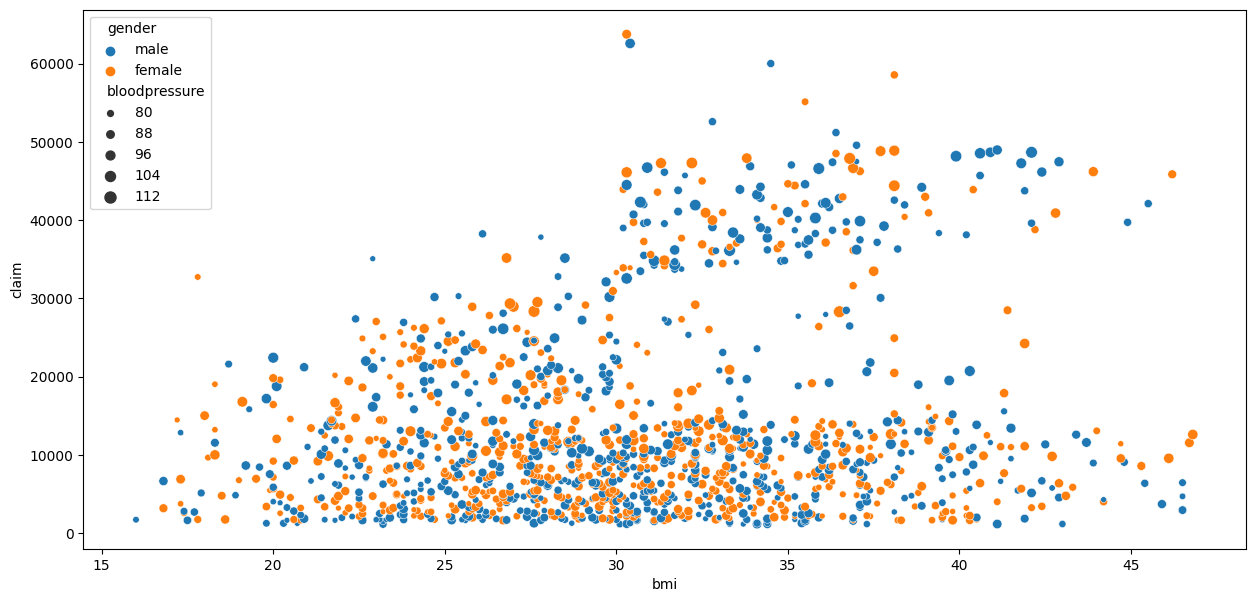

In [59]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x="bmi", y="claim", hue="gender", size = "bloodpressure")
plt.show()

**OBSERVATION :-**
* Claim between 0 to 15000 is more on all range of BMI Index and Gender.

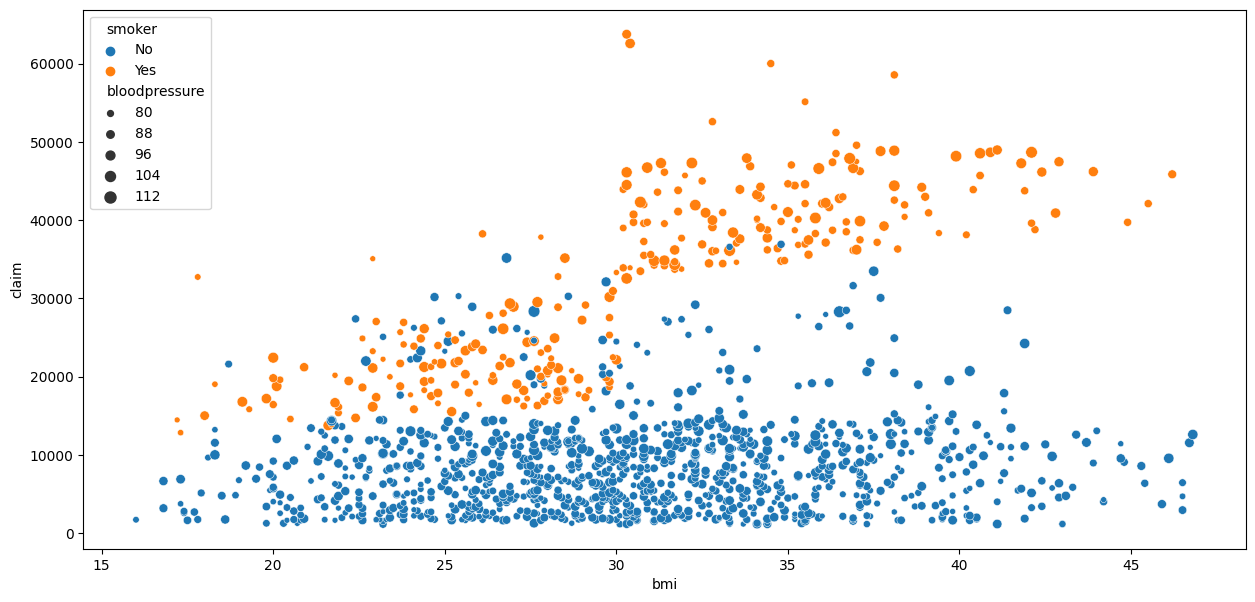

In [60]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x="bmi", y="claim", hue="smoker", size = "bloodpressure")
plt.show()

**OBSERVATION :-**
* Non-Smoker claim less as compare to Smoker.
* Smoker with high blood pressure claim more as compare to Non-Smoke with high and low Blood Pressure.

In [61]:
column_eda = ["age", "bmi", "bloodpressure", "children", "claim", "bmi_cat"]

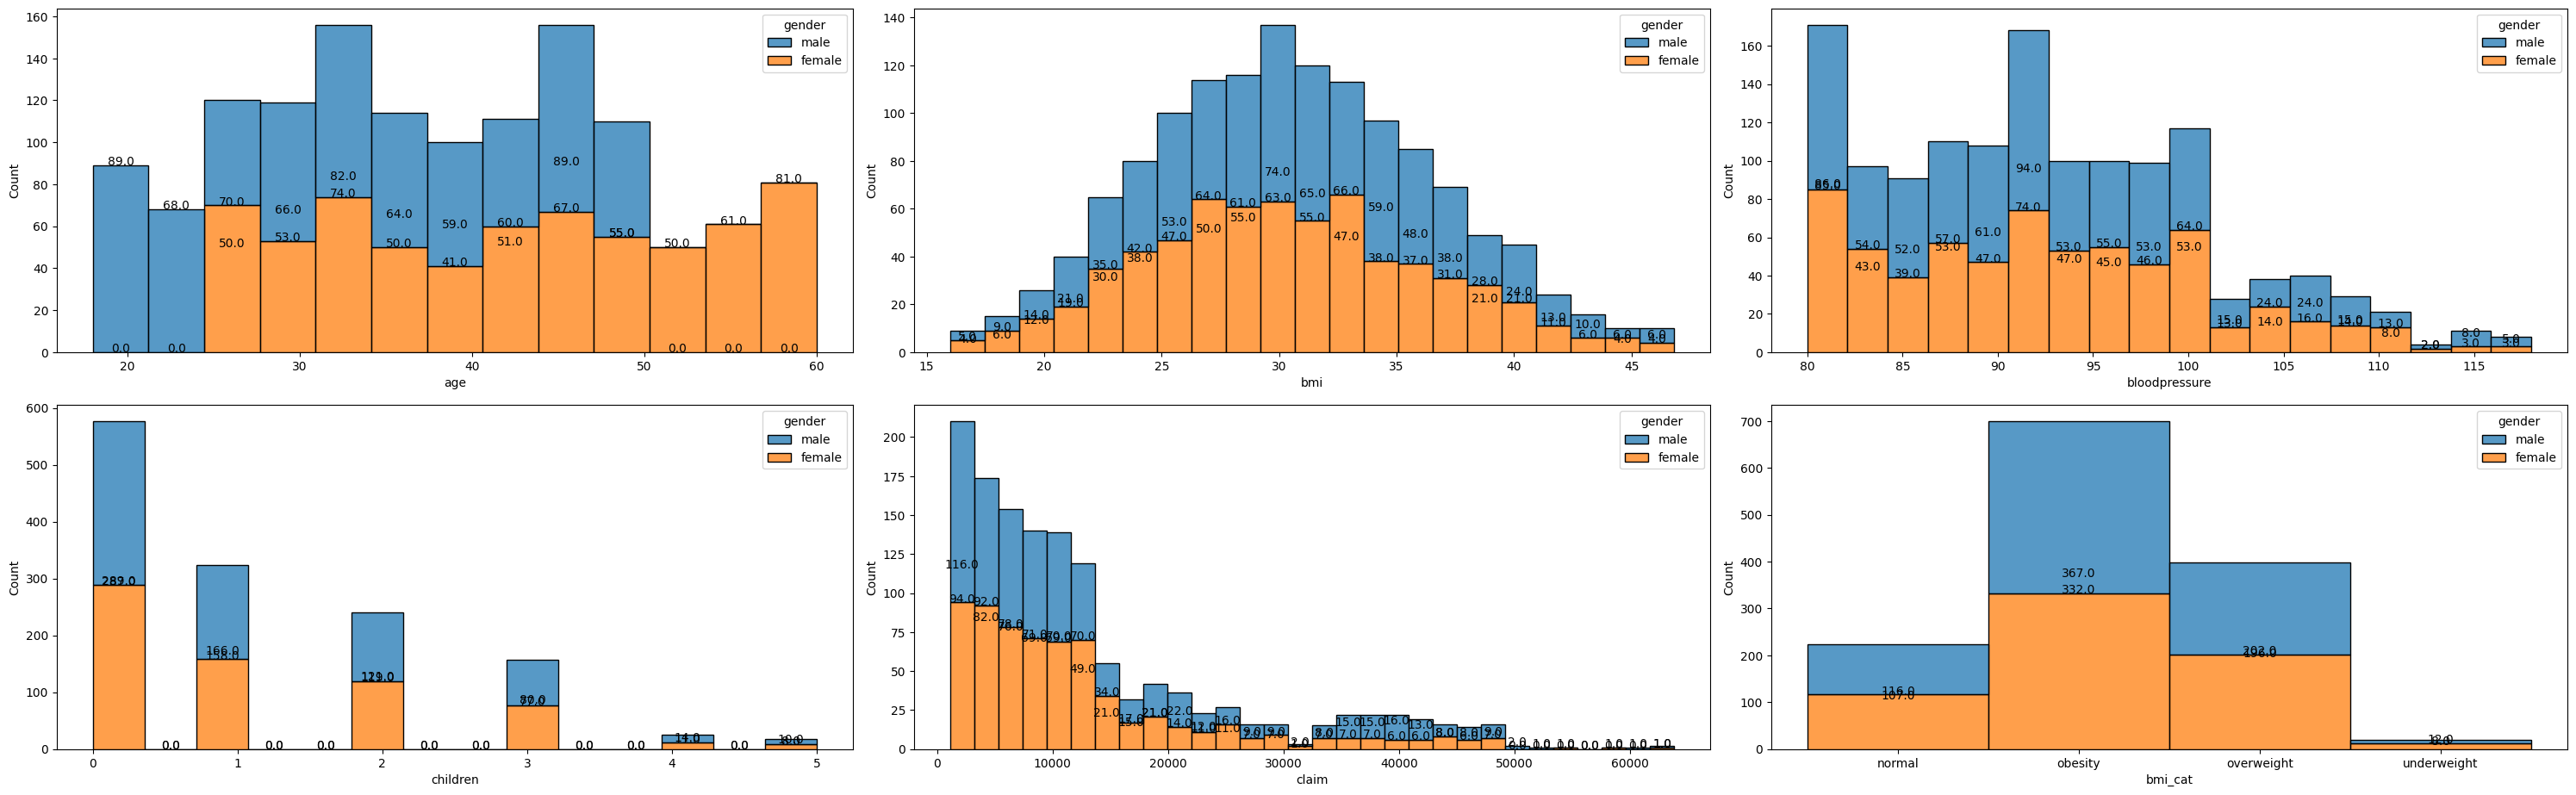

In [62]:
def numeric_based_on_gender(data):
  plt.figure(figsize = (30,230))
  l_row = 50
  l_pos = 1
  for col in column_eda:
    plt.subplot(l_row, 3, l_pos)
    ax = sns.histplot(data=df, x=col, hue="gender", multiple="stack")
    for i in ax.patches:
      percentage = '{:.1f}'.format(i.get_height())
      x = i.get_x()+ i.get_width()/2
      y = i.get_height()
      ax.annotate(percentage, (x, y), ha='center')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

numeric_based_on_gender(df)

**OBSERVATION :-**
* People who have Age between 0 to 25 are 100% dominated Male and between 50 to 60 are 100% dominated Female.
* Both gender are almost equal in BMI Category and Obese people are high.


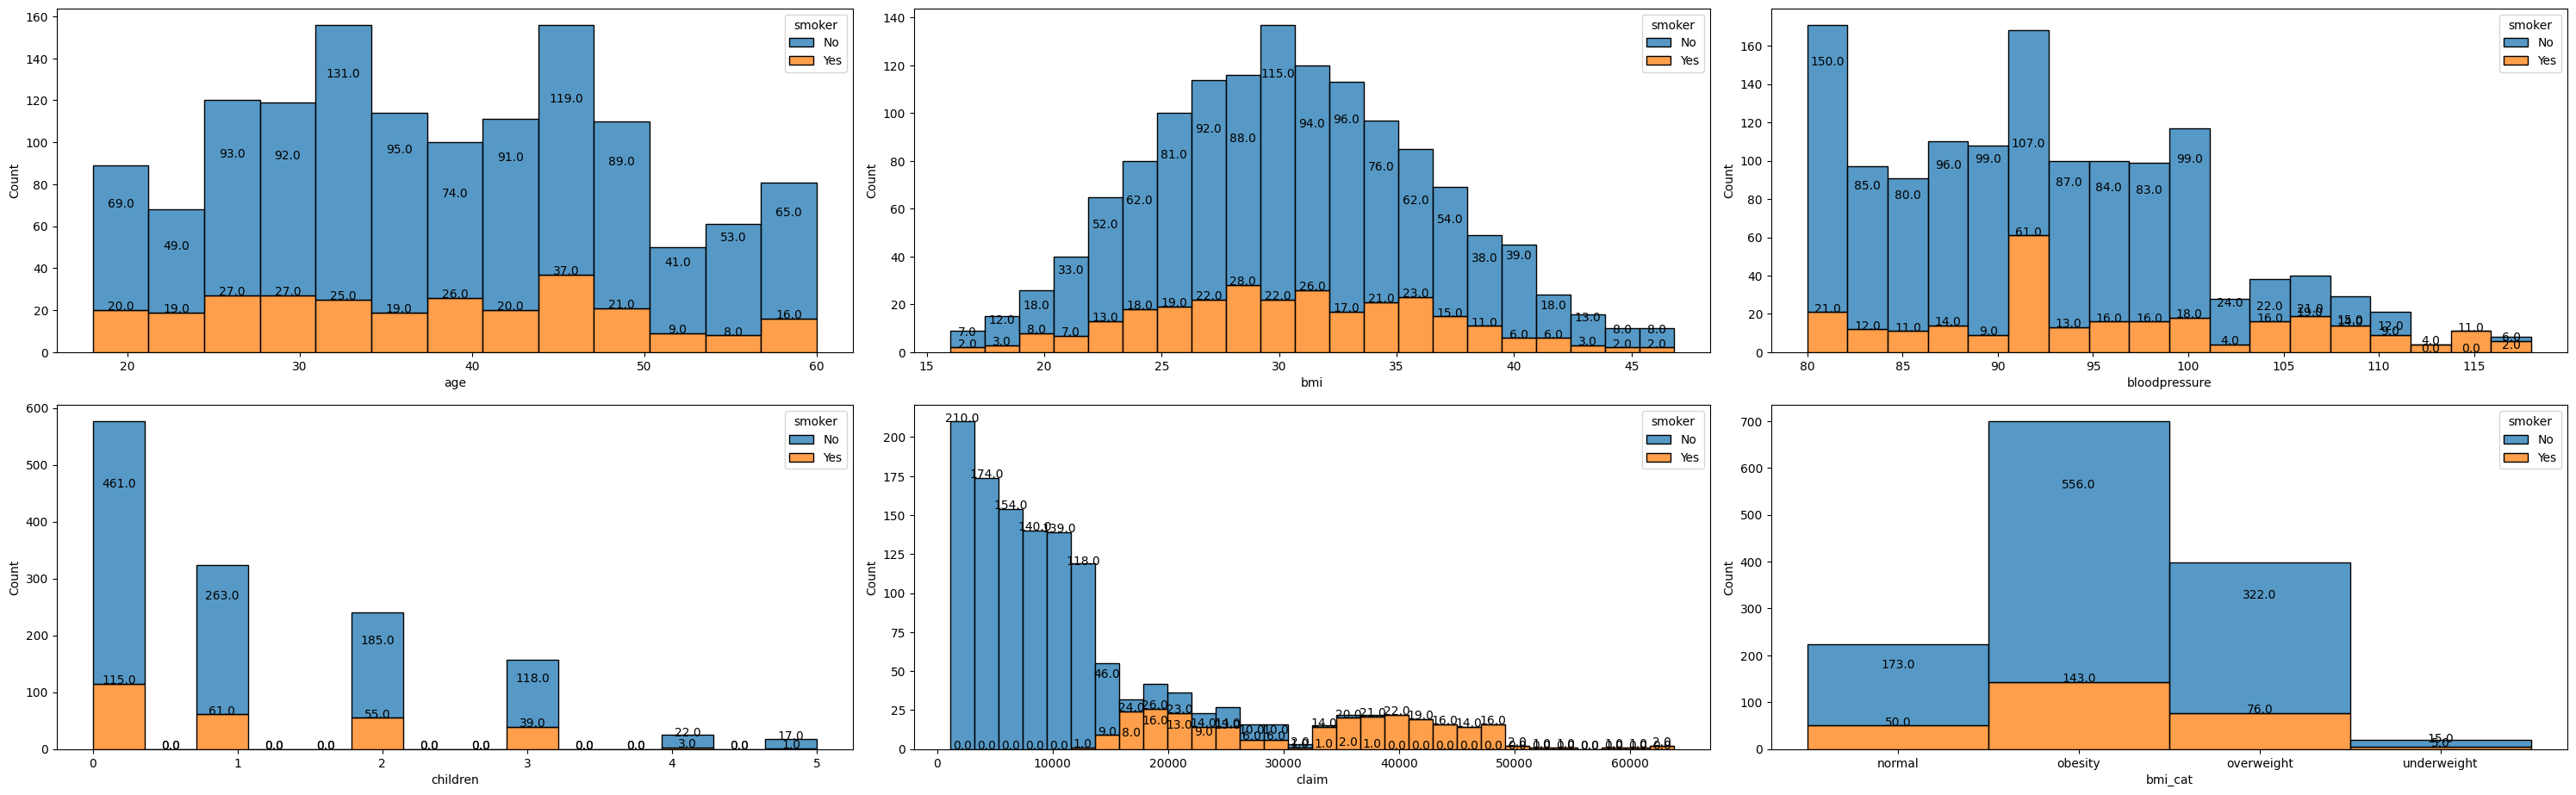

In [63]:
def numeric_based_on_smoker(data):
  plt.figure(figsize = (30,230))
  l_row = 50
  l_pos = 1
  for col in column_eda:
    plt.subplot(l_row, 3, l_pos)
    ax = sns.histplot(data=df, x=col, hue="smoker", multiple="stack")
    for i in ax.patches:
      percentage = '{:.1f}'.format(i.get_height())
      x = i.get_x()+ i.get_width()/2
      y = i.get_height()
      ax.annotate(percentage, (x, y), ha='center')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

numeric_based_on_smoker(df)

**OBSERVATION :-**
* People are high in Obese and Overweight as compare to Normal and Underweight and 556 people who are Obese are Smoker and 141 are Non-Smoker.
* People who claims insurance with total amount between 0 to above 12000 is only dominated by 981 smoker.
* People who have BMI Index and Age is dominated with Non-Smoker by 290%.
* People who claims insurance with total amount between 32000 to above 50000 is only dominated by 144 Non-Smoker.
* People who have blood pressure between 80 to 110 is dominated with Non-Smoker.